In [6]:
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from skimage import measure
from skimage.measure import regionprops


In [7]:
car_image = imread("Test/car.jpg",as_gray=True)
print(car_image.shape)

(3456, 5184)


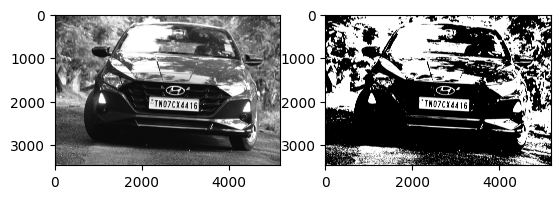

In [8]:
gray_car_image = car_image*255
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(gray_car_image, cmap="gray")
threshold_value = threshold_otsu(gray_car_image)
binary_car_image = gray_car_image > threshold_value
ax2.imshow(binary_car_image,cmap="gray")
plt.show("Binary image(otsu)")

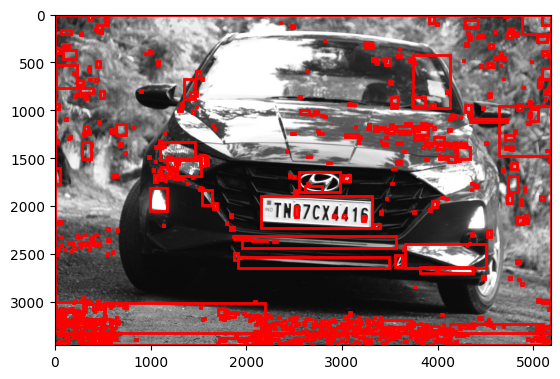

In [12]:
#this gets all the connected regions together  and groups them together
label_image = measure.label(binary_car_image)
fig,(ax1) = plt.subplots()
ax1.imshow(gray_car_image,cmap="gray")

#regionsprops creates a list of properties of all the labelled regions
for region in regionprops(label_image):
    if region.area< 50:
        #if the region is small then it's likely not a license plate
        continue

    #the bounding box coordinates
    minRow,minCol,maxRow,maxCol = region.bbox
    rectBorder  = patches.Rectangle((minCol,minRow),maxCol-minCol,maxRow-minRow,edgecolor ="red",linewidth =2,fill =False)
    ax1.add_patch(rectBorder)


plt.show()    

    